1. 드라이브 마운트 진행
2. 작업 폴더로 이동

In [ ]:
%cd /content/drive/MyDrive/py_pro

3. 필요한 모듈 연결
- requests : 웹에서 정보를 가져오는 모듈
- bs4.BeautifulSoup : 특정 페이지(문서, html) 원하는 정보를 특정 패턴이나 순서로 정의해 원하는 데이터를 추출할 수 있도록 가공해 주는 모듈
- urllib.parse.quote : 한글을 아스키코드로 변경 함수
- pandas : DataFrame 구조로 변경 및 데이터 관리
- sys : 현재 사용하고 있는 시스템 제어
- re : 정규화 표현식

In [ ]:
# 모듈 연결
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from urllib.parse import quote
import sys
import re

4. 원하는 웹사이트의 정보 가져오기

In [ ]:
sch_txt=input('검색어를 입력하세요:')
url='https://www.joongang.co.kr/search/news?keyword=' + quote(sch_txt)

html=requests.get(url)

if html.status_code != 200:  # 페이지 정보를 정상적으로 가저온 경우 status_code 값은 200
    sys.exit('페이지 정보를 가져오지 못했습니다.')

soup = bs(html.text, 'html.parser')  # 파싱 진행
soup

5. 파싱한 데이터에서 뉴스의 세부 link 값 추출
- find() : 찾는 태그의 첫번째 만나는 태그 영역 *반환*
- find_all() : 찾는 모든 태그를 리스트 형식으로 반환

In [ ]:
uls_soup = soup.find('ul', class_="story_list")   # 뉴스 검색 결과값에 대한 항목별 내용 가져오기
headli=uls_soup.find_all("h2", class_="headline")

links=[]
for li in headli:
    link=li.find("a")["href"]
    links.append(link)

links

6. 추출한 url을 이용해 상세 내용 가져오기
- 텍스트 추출후 원하는 형식으로 변경하기
- 불용어 제거(정규식 표현) : https://wikidocs.net/4308
- 정규식 표현 방법
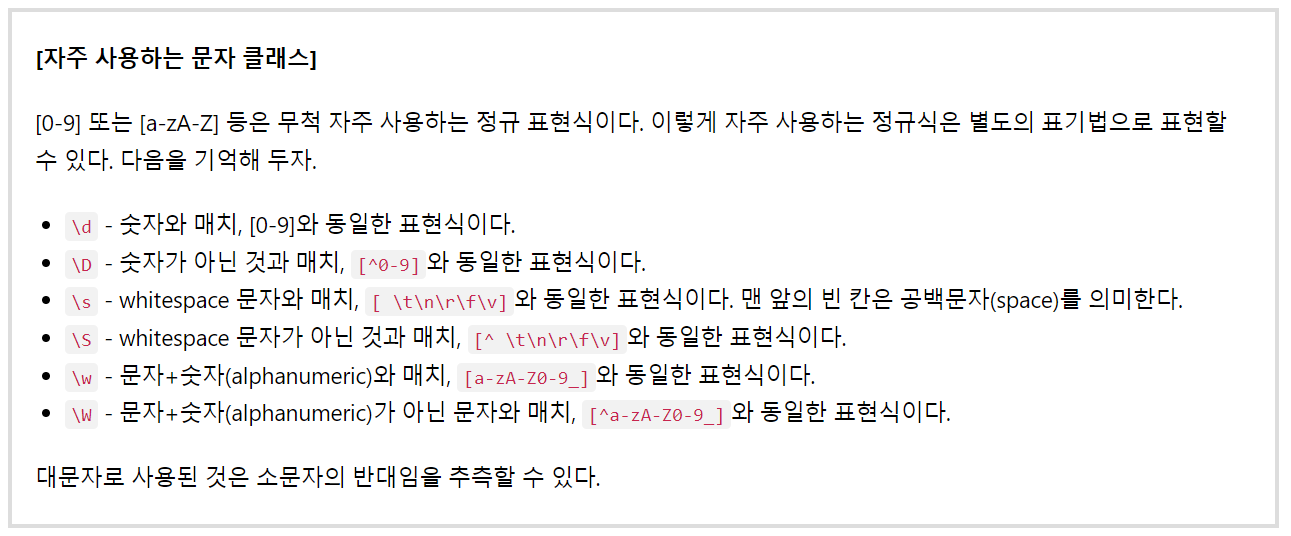
    
)

In [ ]:
doc_list=[]

for u in links:
    html = requests.get(u)   # 추출한 link 값을 이용해 세부 내용 요청
    if html.status_code != 200:
        print('페이지 정보를 가져오지 못했습니다.')
        continue    # 데이터를 가져오기 못했다면 다음 link로 이동

    soup = bs(html.text, 'html.parser')  # 파싱 진행

    # 제목 가져오기
    title=soup.find("h1", class_="headline").get_text()
    title=re.sub('[^ㄱ-ㅣ가-힣a-zA-Z0-9 ]', "", title)
    title=title.replace('apos', "")

    # 입력 날짜 가져오기
    indate=soup.find('p', class_="date").get_text().replace("입력 ", "")[:10]

    # 본문 내용 가져오기
    divs=soup.find('div', id="article_body")   # divs=soup.find('div', class_="article_body fs3")
    doc_soup=divs.find_all('p')

    p_txt=""
    for p in doc_soup:
        p_txt += p.get_text()+" "
    
    p_txt=re.sub('[^ㄱ-ㅣ가-힣a-zA-Z0-9 ]', "", p_txt)
    doc_list.append([title, indate, p_txt])

df0=pd.DataFrame(doc_list, columns=['제목', '입력일', '내용'])   
df0

In [ ]:
# 크롤링 결과 저장하기

df0.to_csv('/content/drive/MyDrive/py_pro/data/중앙일보_' + sch_txt + '.csv', encoding='cp949', index=False)